### One Run Clustering Perfomance (All Methods - Predefined)

          Method        Sheet Name        R2       MSE       MAE  \
0  fuzzy_c_means  1.Inside-Outside  0.978180  0.001913  0.031240   
1  fuzzy_c_means           2.Round  0.991568  0.000728  0.018992   
2  fuzzy_c_means     3.Top_Sirloin  0.987004  0.001122  0.024098   
3  fuzzy_c_means      4.Tenderloin  0.988409  0.001001  0.019634   
4  fuzzy_c_means       5.Flap_meat  0.986401  0.001174  0.025120   

   Rule Base Clustering Time  Features Clustering Time  Total Clustering Time  
0                   0.390354                  1.067226               1.457580  
1                   0.307209                  0.875269               1.182477  
2                   0.332272                  1.126159               1.458431  
3                   0.323436                  0.804847               1.128282  
4                   0.237295                  1.007285               1.244580  


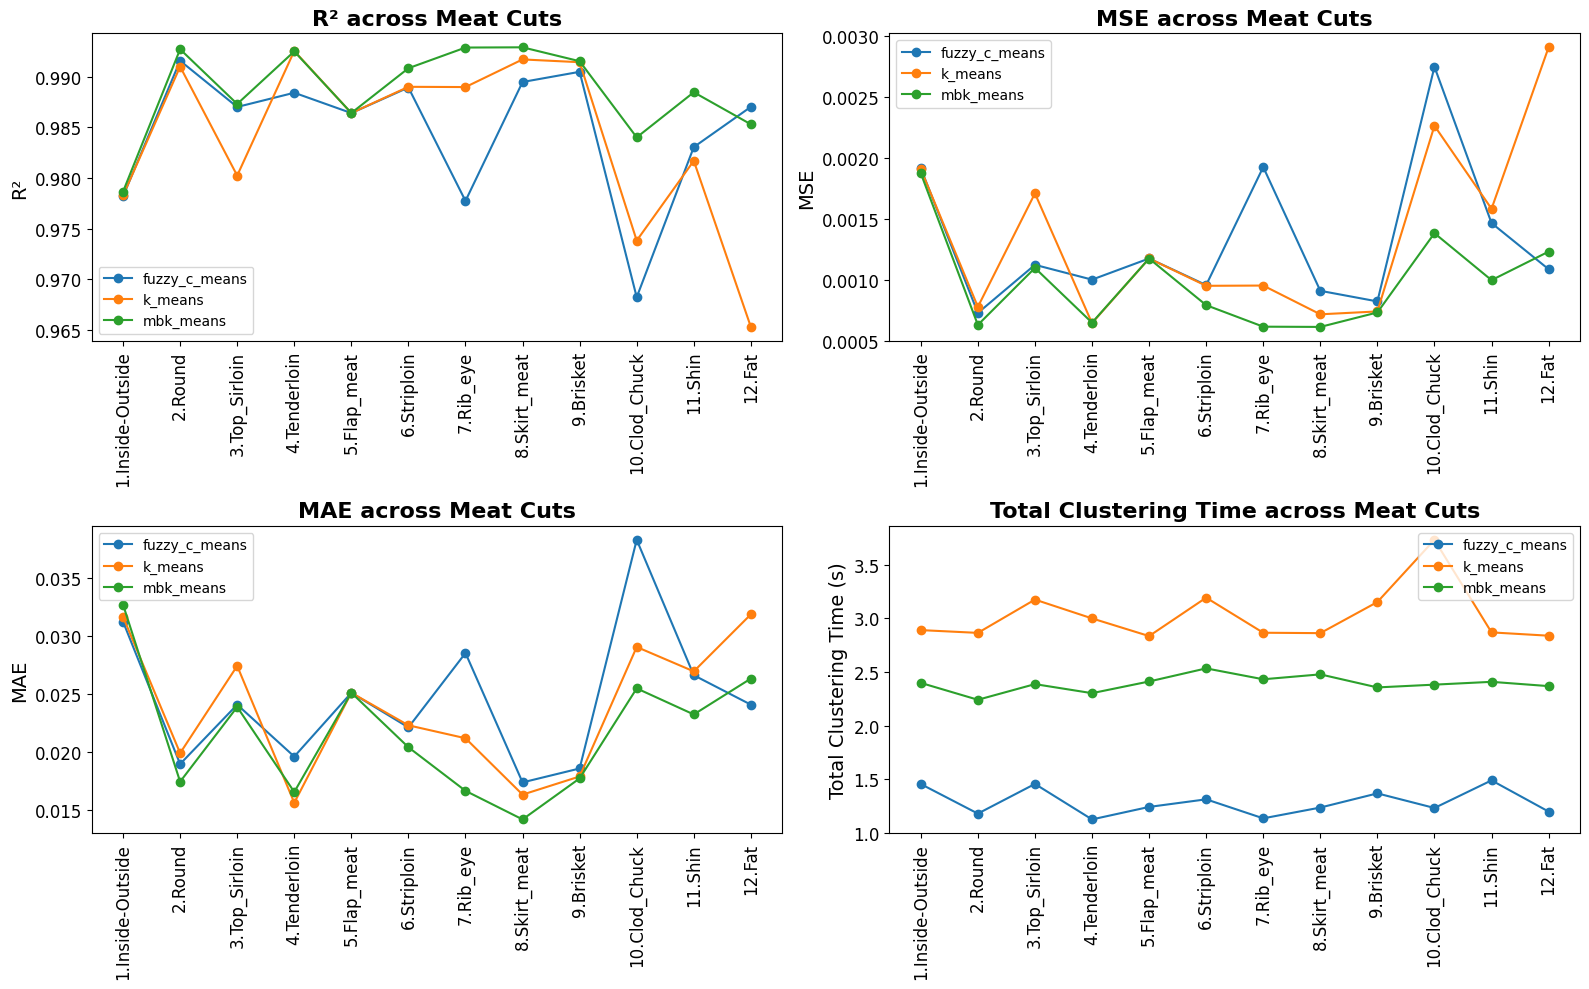

In [71]:
from notebook_resolver import *
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace with your filename and sheet name if needed)
# Example: df = pd.read_excel("clustering_results.xlsx", sheet_name="Sheet1")
path = "results/clustering_optimization_one_run.xlsx"
sheet_name = "Sheet1"
df = pd.read_excel(path, sheet_name=sheet_name)

# Check the first few rows to ensure it loads correctly
print(df.head())

# Create 4-panel figure: R², MSE, MAE, and Total Time
plt.figure(figsize=(16, 10))

# Subplot 1: R²
plt.subplot(2, 2, 1)
for method, group in df.groupby("Method"):
    plt.plot(group["Sheet Name"], group["R2"], marker="o", label=method)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("R²", fontsize=14)
plt.title("R² across Meat Cuts", fontsize=16, fontweight='bold')
plt.legend()

# Subplot 2: MSE
plt.subplot(2, 2, 2)
for method, group in df.groupby("Method"):
    plt.plot(group["Sheet Name"], group["MSE"], marker="o", label=method)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("MSE", fontsize=14)
plt.title("MSE across Meat Cuts", fontsize=16, fontweight='bold')
plt.legend()

# Subplot 3: MAE
plt.subplot(2, 2, 3)
for method, group in df.groupby("Method"):
    plt.plot(group["Sheet Name"], group["MAE"], marker="o", label=method)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("MAE", fontsize=14)
plt.title("MAE across Meat Cuts", fontsize=16, fontweight='bold')
plt.legend()

# Subplot 4: Total Clustering Time
plt.subplot(2, 2, 4)
for method, group in df.groupby("Method"):
    plt.plot(group["Sheet Name"], group["Total Clustering Time"], marker="o", label=method)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Total Clustering Time (s)", fontsize=14)
plt.title("Total Clustering Time across Meat Cuts", fontsize=16, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()


In [72]:
stats_by_method = df.groupby('Method').agg({
    'R2': ['mean', 'std', 'min', 'max'],
    'MSE': ['mean', 'std', 'min', 'max'],
    'MAE': ['mean', 'std', 'min', 'max'],
    'Total Clustering Time': ['mean', 'std', 'min', 'max']
}).round(6)

In [73]:
comparison_table = df.pivot_table(
    values=['R2', 'MSE', 'MAE', 'Total Clustering Time'], 
    index='Sheet Name', 
    columns='Method', 
    aggfunc='first'
).round(6)

In [74]:
speed_analysis = df.pivot_table(
    values='Total Clustering Time', 
    index='Sheet Name', 
    columns='Method', 
    aggfunc='first'
).round(4)

In [75]:
speed_analysis['K_means_vs_FCM_ratio'] = (speed_analysis['k_means'] / 
                                         speed_analysis['fuzzy_c_means']).round(2)
speed_analysis['MBK_means_vs_FCM_ratio'] = (speed_analysis['mbk_means'] / 
                                           speed_analysis['fuzzy_c_means']).round(2)

# Calculate percentage improvements
speed_analysis['FCM_vs_K_means_improvement%'] = (
    ((speed_analysis['k_means'] - speed_analysis['fuzzy_c_means']) / 
     speed_analysis['k_means']) * 100).round(1)

speed_analysis['FCM_vs_MBK_means_improvement%'] = (
    ((speed_analysis['mbk_means'] - speed_analysis['fuzzy_c_means']) / 
     speed_analysis['mbk_means']) * 100).round(1)

print("Speed Ratios (Times Faster):")
print(speed_analysis[['fuzzy_c_means', 'k_means', 'mbk_means', 
                     'K_means_vs_FCM_ratio', 'MBK_means_vs_FCM_ratio']])

print("\nTime Reduction Percentages:")
print(speed_analysis[['FCM_vs_K_means_improvement%', 'FCM_vs_MBK_means_improvement%']])

print("\n" + "="*80)
print("DETAILED PERFORMANCE METRICS")
print("="*80)

# Create detailed metrics table
detailed_metrics = []

for meat_cut in df['Sheet Name'].unique():
    cut_data = df[df['Sheet Name'] == meat_cut]

    fcm_data = cut_data[cut_data['Method'] == 'fuzzy_c_means'].iloc[0]
    k_means_data = cut_data[cut_data['Method'] == 'k_means'].iloc[0]
    mbk_data = cut_data[cut_data['Method'] == 'mbk_means'].iloc[0]
    
    metrics = {
        'Meat_Cut': meat_cut,
        'FCM_R2': fcm_data['R2'],
        'K_means_R2': k_means_data['R2'],
        'MBK_R2': mbk_data['R2'],
        'FCM_Time': fcm_data['Total Clustering Time'],
        'K_means_Time': k_means_data['Total Clustering Time'],
        'MBK_Time': mbk_data['Total Clustering Time'],
        'FCM_vs_K_means_Speed_Ratio': round(k_means_data['Total Clustering Time'] / 
                                           fcm_data['Total Clustering Time'], 2),
        'FCM_vs_MBK_Speed_Ratio': round(mbk_data['Total Clustering Time'] / 
                                       fcm_data['Total Clustering Time'], 2),
        'R2_Advantage_vs_K_means': round((fcm_data['R2'] - k_means_data['R2']) * 100, 3),
        'R2_Advantage_vs_MBK': round((fcm_data['R2'] - mbk_data['R2']) * 100, 3)
    }
    detailed_metrics.append(metrics)

detailed_df = pd.DataFrame(detailed_metrics)
print(detailed_df.to_string(index=False))

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

# Summary statistics
fcm_avg_time = df[df['Method'] == 'fuzzy_c_means']['Total Clustering Time'].mean()
k_means_avg_time = df[df['Method'] == 'k_means']['Total Clustering Time'].mean()
mbk_avg_time = df[df['Method'] == 'mbk_means']['Total Clustering Time'].mean()

overall_speed_vs_k = k_means_avg_time / fcm_avg_time
overall_speed_vs_mbk = mbk_avg_time / fcm_avg_time

print(f"Average Processing Times:")
print(f"  FCM: {fcm_avg_time:.3f} seconds")
print(f"  K-means: {k_means_avg_time:.3f} seconds")
print(f"  MBK-means: {mbk_avg_time:.3f} seconds")

print(f"\nOverall Speed Advantages:")
print(f"  FCM is {overall_speed_vs_k:.1f}x faster than K-means")
print(f"  FCM is {overall_speed_vs_mbk:.1f}x faster than MBK-means")

print(f"\nTime Reduction:")
print(f"  FCM vs K-means: {((k_means_avg_time - fcm_avg_time) / k_means_avg_time * 100):.1f}% faster")
print(f"  FCM vs MBK-means: {((mbk_avg_time - fcm_avg_time) / mbk_avg_time * 100):.1f}% faster")

# Accuracy comparison
fcm_avg_r2 = df[df['Method'] == 'fuzzy_c_means']['R2'].mean()
k_means_avg_r2 = df[df['Method'] == 'k_means']['R2'].mean()
mbk_avg_r2 = df[df['Method'] == 'mbk_means']['R2'].mean()

print(f"\nAverage R² Scores:")
print(f"  FCM: {fcm_avg_r2:.6f}")
print(f"  K-means: {k_means_avg_r2:.6f}")
print(f"  MBK-means: {mbk_avg_r2:.6f}")

print(f"\nR² Advantage:")
print(f"  FCM vs K-means: +{(fcm_avg_r2 - k_means_avg_r2)*100:.3f} percentage points")
print(f"  FCM vs MBK-means: +{(fcm_avg_r2 - mbk_avg_r2)*100:.3f} percentage points")

print("\n" + "="*80)
print("BEST AND WORST PERFORMERS")
print("="*80)

# Find best and worst performers for FCM
fcm_data = df[df['Method'] == 'fuzzy_c_means'].copy()
fcm_data = fcm_data.sort_values('R2', ascending=False)

print("🏆 TOP 3 FCM PERFORMERS (by R²):")
for i, (_, row) in enumerate(fcm_data.head(3).iterrows(), 1):
    speed_vs_k = detailed_df[detailed_df['Meat_Cut'] == row['Sheet Name']]['FCM_vs_K_means_Speed_Ratio'].iloc[0]
    speed_vs_mbk = detailed_df[detailed_df['Meat_Cut'] == row['Sheet Name']]['FCM_vs_MBK_Speed_Ratio'].iloc[0]
    print(f"  {i}. {row['Sheet Name']}: R²={row['R2']:.6f}, "
          f"Time={row['Total Clustering Time']:.3f}s, "
          f"Speed: {speed_vs_k:.1f}x vs K-means, {speed_vs_mbk:.1f}x vs MBK")

print("\n⚠️  BOTTOM 3 FCM PERFORMERS (by R²):")
for i, (_, row) in enumerate(fcm_data.tail(3).iterrows(), 1):
    speed_vs_k = detailed_df[detailed_df['Meat_Cut'] == row['Sheet Name']]['FCM_vs_K_means_Speed_Ratio'].iloc[0]
    speed_vs_mbk = detailed_df[detailed_df['Meat_Cut'] == row['Sheet Name']]['FCM_vs_MBK_Speed_Ratio'].iloc[0]
    print(f"  {i}. {row['Sheet Name']}: R²={row['R2']:.6f}, "
          f"Time={row['Total Clustering Time']:.3f}s, "
          f"Speed: {speed_vs_k:.1f}x vs K-means, {speed_vs_mbk:.1f}x vs MBK")

print("\n" + "="*80)
print("EXAMPLE SPEED CALCULATION")
print("="*80)

# Show example calculation
example_cut = '1.Inside-Outside'
example_data = detailed_df[detailed_df['Meat_Cut'] == example_cut].iloc[0]

print(f"Example: {example_cut}")
print(f"  FCM Time: {example_data['FCM_Time']:.3f} seconds")
print(f"  K-means Time: {example_data['K_means_Time']:.3f} seconds")
print(f"  ")
print(f"  Speed Ratio Calculation:")
print(f"  {example_data['K_means_Time']:.3f} ÷ {example_data['FCM_Time']:.3f} = {example_data['FCM_vs_K_means_Speed_Ratio']:.1f}x faster")
print(f"  ")
print(f"  This means FCM is {example_data['FCM_vs_K_means_Speed_Ratio']:.1f} times faster than K-means")
print(f"  Or FCM takes {100/example_data['FCM_vs_K_means_Speed_Ratio']:.1f}% of the time K-means takes")

Speed Ratios (Times Faster):
Method            fuzzy_c_means  k_means  mbk_means  K_means_vs_FCM_ratio  \
Sheet Name                                                                  
1.Inside-Outside         1.4576   2.8902     2.3989                  1.98   
10.Clod_Chuck            1.2347   3.7305     2.3827                  3.02   
11.Shin                  1.4917   2.8689     2.4088                  1.92   
12.Fat                   1.2014   2.8381     2.3689                  2.36   
2.Round                  1.1825   2.8644     2.2418                  2.42   
3.Top_Sirloin            1.4584   3.1742     2.3875                  2.18   
4.Tenderloin             1.1283   2.9992     2.3032                  2.66   
5.Flap_meat              1.2446   2.8347     2.4120                  2.28   
6.Striploin              1.3154   3.1921     2.5340                  2.43   
7.Rib_eye                1.1383   2.8657     2.4325                  2.52   
8.Skirt_meat             1.2388   2.8619     2.

In [76]:
speed_analysis[['fuzzy_c_means', 'k_means', 'mbk_means', 
                     'K_means_vs_FCM_ratio', 'MBK_means_vs_FCM_ratio']]

Method,fuzzy_c_means,k_means,mbk_means,K_means_vs_FCM_ratio,MBK_means_vs_FCM_ratio
Sheet Name,,,,,
1.Inside-Outside,1.4576,2.8902,2.3989,1.98,1.65
10.Clod_Chuck,1.2347,3.7305,2.3827,3.02,1.93
11.Shin,1.4917,2.8689,2.4088,1.92,1.61
12.Fat,1.2014,2.8381,2.3689,2.36,1.97
2.Round,1.1825,2.8644,2.2418,2.42,1.90
3.Top_Sirloin,1.4584,3.1742,2.3875,2.18,1.64
4.Tenderloin,1.1283,2.9992,2.3032,2.66,2.04
5.Flap_meat,1.2446,2.8347,2.4120,2.28,1.94
6.Striploin,1.3154,3.1921,2.5340,2.43,1.93


In [77]:
speed_analysis[['fuzzy_c_means', 'k_means', 'mbk_means', 
                     'K_means_vs_FCM_ratio', 'MBK_means_vs_FCM_ratio']].to_excel(
	"results/clustering_speed_analysis.xlsx", index_label="Meat Cut")